Importación de librerias necesarias para desarrollar el laboratorio:


In [1]:
import numpy as np
import pandas as pd
import sympy as sp
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid
from scipy.integrate import simpson
from scipy.integrate import quad

#Primera Parte:

Circuito con Voltaje $𝝴(t)$ y una inductancia L, aplicando leyes de Kirchhoff resolvemos el sistema dado:


In [2]:
t=np.array([1, 1.01, 1.02, 1.03, 1.04])
i=np.array([3.1, 3.12, 3.14, 3.18, 3.24])

dicc =  {"T":t, "Corriente":i}

df = pd.DataFrame(dicc)
df

,T,Corriente
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


In [3]:
#Derivada numèrica de datos a través de np.
derivada = np.diff(i)/np.diff(t)

# Definición de una función para calcular el promedio
def promedio(array):
    return (array[0:len(array) - 1] + array[1:len(array)]) / 2


#Promedio de la corriente para la resistencia:
i_prom = promedio(i)
t_prom = promedio(t)

#Valor de inductancia:
L = 0.98
R = 0.142

#Calculo de Fem:
fem = L*derivada + R * i_prom

#Creación del data frame en pandas de los nuevos vlores:
dicc2= {"T Promedio": t_prom, "I promedio": i_prom, "Derivada Nume":derivada, "Voltaje":fem }
df1=pd.DataFrame(dicc2)

#Impresion del Data frame:
df1

,T Promedio,I promedio,Derivada Nume,Voltaje
0,1.005,3.11,2.0,2.40162
1,1.015,3.13,2.0,2.40446
2,1.025,3.16,4.0,4.36872
3,1.035,3.21,6.0,6.33582


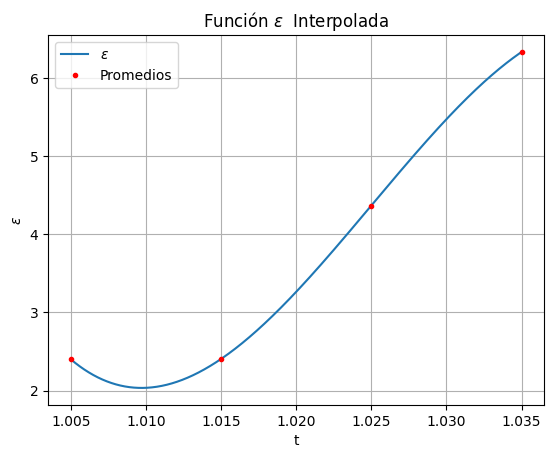

In [4]:
#Interpolación de valores de Fem por medio de CubicSpline:
t1 = np.linspace(t_prom[0], t_prom[-1], 1000)

cs = CubicSpline(t_prom, fem)

fem_vals = cs(t1)

plt.plot(t1, fem_vals, label='$\epsilon$')
plt.plot(t_prom, fem, "r.", label= "Promedios")
plt.xlabel('t')
plt.ylabel('$\epsilon$')
plt.title('Función $\epsilon$  Interpolada' )
plt.grid(True)
plt.legend()

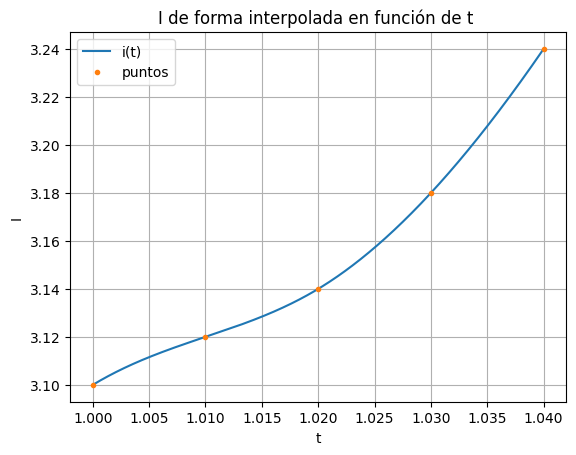

In [5]:
# Interpolamos los valores de la corriente con el tiempo:
t_valss = np.linspace(t[0], t[-1], 1000)

# Creación de una función de interpolación cúbica (CubicSpline) para i en función de t
css = CubicSpline(t, i)

# Cálculo de los valores interpolados de i en t_valss
i_vals = css(t_valss)

# Creación de un gráfico que muestra i en función del tiempo
plt.plot(t_valss, i_vals, label='i(t)')  # Línea de la función interpolada
plt.plot(t, i, ".", label="puntos")    # Puntos de datos originales
plt.xlabel('t')
plt.ylabel('I')
plt.title('I de forma interpolada en función de t ')
plt.grid(True)
plt.legend()
plt.show()

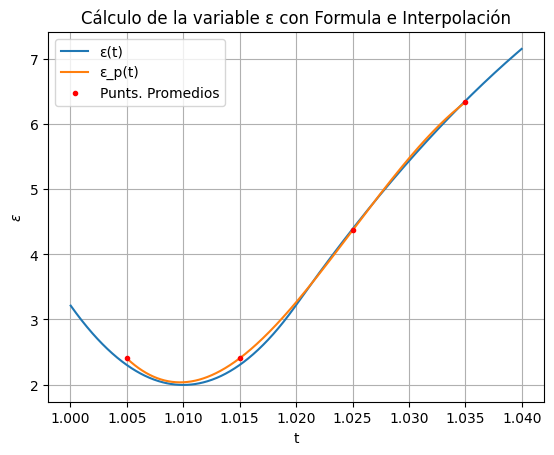

In [6]:
# Cálculo de la derivada de i_vals con respecto a t_valss usando np.diff
didt_f = np.diff(i_vals) / np.diff(t_valss)

# Cálculo de los promedios de i_vals y t_valss
i_vals_p = promedio(i_vals)
t_valss_p = promedio(t_valss)

# Cálculo de la variable ε (ε_f) usando la fórmula dada
ε_f = L * didt_f + R * i_vals_p

# Creación de un gráfico que muestra ε en función del tiempo
plt.plot(t_valss_p, ε_f, label='ε(t)')  # Línea de la función calculada
plt.plot(t1, fem_vals, label='ε_p(t)')  # Línea de la función interpolada ε_p
plt.plot(t_prom, fem, "r.", label= "Punts. Promedios")
plt.title("Cálculo de la variable ε con Formula e Interpolación")
plt.xlabel('t')
plt.ylabel('$\epsilon$')
plt.grid(True)
plt.legend()
plt.show()

#Parte Dos:
###Metodo del trapecio:

La regla del trapecio es un método de integración numérica que se utiliza para aproximar el valor de una integral definida. Este método se basa en la aproximación del área bajo la curva de una función mediante trapecios. La idea es dividir el área bajo la curva en varios trapecios y sumar las áreas de los trapecios para obtener una aproximación del área total.

La fórmula para calcular la aproximación de la integral mediante la regla del trapecio es:

$$\int_{a}^{b}f(x)dx \approx \frac{b-a}{2n}\left[f(a)+2f(a+\frac{b-a}{n})+2f(a+2\frac{b-a}{n})+...+2f(b-\frac{b-a}{n})+f(b)\right]$$

donde $n$ es el número de trapecios utilizados para aproximar el área bajo la curva.


Expresion en Markdown para calcular integral con la regla del trepecio:



```
#Método del trapecio:

#Defino para calcular la Inytegral por método de trapecios de la figura.
#Donde se recibe: la función X, los limites de la integral y el número de iteraciones.
def intetrap(f, a, b, N):

  x= np.linspace(a,b, int(N))

  dx = (b-a)/N  #Distancia de cada trapecio o desplazamiento; en este caso constante de x

  A= ((f(x[0]) + f(x[-1])) + 2*f(x[1:-1]).sum()) * dx * 0.5 #Área de Trapecio.

  return A


#Defino f, para aplicar método de integral.
f =lambda x: x**2

#Aplico los parámetros a la función intetrap que calcula la integral por trapecios.
A=intetrap(f, 0, 4, 10000)
A


#Calculamos las aproximaciones numéricas de la integral respecto a las iteraciones N.

# Crear un arreglo de 10 números espaciados uniformemente entre 100 y 10000
N= np.linspace(100,10000,10)

# Crear un arreglo de ceros con la misma longitud que N
areas = np.zeros(len(N))

# Iterar sobre los elementos de N y calcular la integral para cada uno
for i, n_ in enumerate(N):
  areas[i] = intetrap(f, 0, 4, n_)

#Gráfica de resultados:
plt.plot(N,areas)
plt.xlabel("N")
plt.ylabel("Area")
plt.grid()
plt.show()


```




### Método Simpson:

La regla de Simpson es un método de integración numérica que se utiliza para aproximar el valor de una integral definida. Este método se basa en la aproximación del área bajo la curva de una función mediante parábolas. La idea es dividir el área bajo la curva en varios subintervalos y aproximar
cada subintervalo por una parábola.

La fórmula para calcular la aproximación de la integral mediante la regla de Simpson es:

$$\int_{a}^{b}f(x)dx \approx \frac{b-a}{6n}\left[f(a)+4f(a+\frac{b-a}{2n})+2f(a+\frac{b-a}{n})+4f(a+3\frac{b-a}{2n})+...+4f(b-\frac{b-a}{2n})+f(b)\right]$$

donde $n$ es el número de subintervalos utilizados para aproximar el área bajo la curva.


La expresiónn en Markdown para calcular una integral por el método de Simpson es:

```
#Método de Simpson:

#Defino la funciòn Simpson:

def simpsons(f,a,b):

  A = ((b - a)/6) * (f(a) + 4*f((a+b)/2) + f(b))

  return A


#Defino funcione y lìmite:

f = lambda x: (x**2) - 1
a = 0
b = 4

print("La integral es: ", simpsons(f,a,b))

```



### Método de Cuadratura

La cuadratura de Gauss es un método de integración numérica que se utiliza para aproximar el valor de una integral definida. Este método se basa en la aproximación del área bajo la curva de una función mediante polinomios. La idea es dividir el área bajo la curva en varios subintervalos y aproximar cada subintervalo por un polinomio. La fórmula para calcular la aproximación de la integral mediante la cuadratura de Gauss es:

$$\int_{a}^{b}f(x)dx \approx \sum_{i=1}^{n}w_if(z_i)$$

donde $n$ es el número de puntos utilizados para aproximar el área bajo la curva, $w_i$ son los pesos asociados a cada punto y $z_i$ son los puntos de evaluación.

La cuadratura de Gauss es un método muy preciso y eficiente para aproximar el valor de una integral definida. Existen varias variantes del método, como la cuadratura de Gauss-Legendre, la cuadratura de Gauss-Hermite y la cuadratura de Gauss-Laguerre, entre otras.

La fórmula para calcular los pesos y los puntos de evaluación depende del tipo de cuadratura que se esté utilizando. En el caso de la cuadratura de Gauss-Legendre, los pesos y los puntos de evaluación se calculan utilizando los polinomios ortogonales de Legendre. La fórmula para calcular los pesos y los puntos de evaluación es:

$$w_i = \frac{2}{(1-z_i^2)[P_n'(z_i)]^2}$$

donde $P_n(x)$ es el polinomio ortogonal de Legendre de grado $n$ y $z_i$ son las raíces del polinomio $P_{n+1}(x)$.

La expresión para calcular una integral por método de cuadratura de Gauss es:

```
def Cuadratura_G(f, a, b, n):
    # Calculate los pesos y nodos for la cuadratura:
    x, w = np.polynomial.legendre.leggauss(n)

    # Mapea  los pesos y nodos en los intervalos [a, b]:
    x_mapped = 0.5 * (b - a) * x + 0.5 * (b + a)
    w_mapped = 0.5 * (b - a) * w

    # Evalua la función en los nodos y suma the resultados:
    return np.sum(w_mapped * f(x_mapped))

# Ejemplo:
f = lambda x: np.sin(x)
a = 0
b = np.pi / 2
n = 10

approximation = Cuadratura_G(f, a, b, n)
print(f"The approximation of the integral of sin(x) from {a} to {b} is {approximation}")
```


In [7]:
#Calculo de la primera Integral:

x = sp.symbols("x")
e = sp.symbols("e")

f = 1/sp.sqrt(sp.tan (x))

a= e
b = (sp.pi/2) - e

integral = sp.integrate(f, (x,a,b))
integral

Integral(1/sqrt(tan(x)), (x, e, -e + pi/2))

<ipython-input-8-d97ba4b27b2b>:4: RuntimeWarning: divide by zero encountered in divide
  f = lambda x: 1/(np.tan(x))


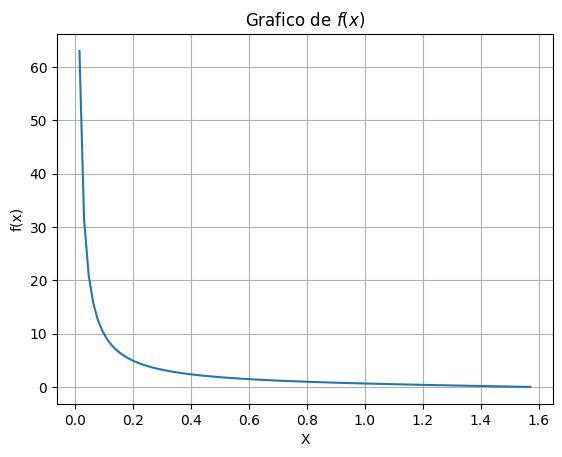

In [8]:
#Grafico la función para analizarlos por medio de trapecios:

#Defino la función como objeto numpy:
f = lambda x: 1/(np.tan(x))

# Definición de intervalo  X a gráficar:
x = np.linspace(0,np.pi/2,100)
#Gráfica:
plt.plot(x,f(x))
plt.title('Grafico de $f(x)$')
plt.xlabel('X')
plt.ylabel('f(x)')
plt.grid()
plt.show()

Notamos como la gráfica encuentra una división por cero, cuando $x=0$ , además notamos cómo no está definida para cuando $x= π/2 $.

Por esta razón, tomamos un valor de epsilopn, el cuál nos quedaría:

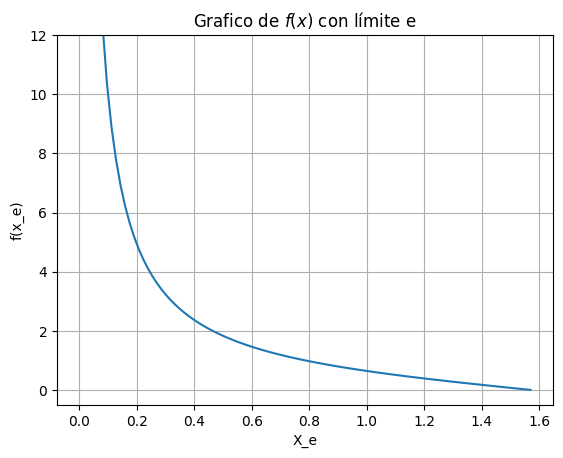

In [9]:
#Definimos el valor de epsilon:
e = 10e-4

a = e
b = (np.pi/2) - e

# Redefinimos el intervalo de X:
x_e = np.linspace(a,b,100)

#Gráficos:
plt.plot(x_e, f(x_e))
plt.title('Grafico de $f(x)$ con límite e')
plt.xlabel('X_e')
plt.ylim(-0.5,12)
plt.ylabel('f(x_e)')
plt.grid()
plt.show()

In [10]:
# Solución de integral por medio de trapecio:
# Defino para calcular la Integral por método de trapecios de la figura.
# Donde se recibe: la función X, los limites de la integral y el número de iteraciones.
def intetrap(f, a, b, N):
  x= np.linspace(a,b, int(N))
  dx = (b-a)/N  #Distancia de cada trapecio o desplazamiento; en este caso constante de x
  A= ((f(x[0]) + f(x[-1])) + 2*f(x[1:-1]).sum()) * dx * 0.5 #Área de Trapecio.
  return A
T = intetrap(f,a,b,10000000)

#Solución de integral por método Simpson:
#Defino la funciòn Simpson Compuesta:
def simpcom(f,a,b,n):
  h = (b-a)/n
  x = np.linspace(a,b,n)
  s_1 = 0
  s_2 = 0
  for j in range(0, int((n/2))):
    s_1 += f(x[2*j])
    s_2 += f(x[(2*j) - 1])
  s_2 += f(x[n-1])
  A= (h/3)*(f(a) + (2 * s_1) + (4 * s_2) + f(b))
  return A
S = simpcom(f,a,b,10000000)

#Solución de integtral por Cuadratura de Gauss:
def Cuadratura_G(f, a, b, n):
  # Calculate los pesos y nodos for la cuadratura:
  x, w = np.polynomial.legendre.leggauss(n)

  # Mapea  los pesos y nodos en los intervalos [a, b]:
  x_mapped = 0.5 * (b - a) * x + 0.5 * (b + a)
  w_mapped = 0.5 * (b - a) * w
  # Evalua la función en los nodos y suma the resultados:
  return np.sum(w_mapped * f(x_mapped))
C = Cuadratura_G(f,a,b,1000)


In [11]:
# Imprimimos resultado:
print('METODO TRAPECIO:')
print('La integral por medio de nuestro programa da:',T)
print('La integral por medio de la librería scipy da:', trapezoid(f(x_e),x_e))
print()
print('METODO SIMPSON COMPUESTO:')
print('La integral por medio de nuestro programa da:',S)
print('La integral por medio de la librería scipy da:', simpson(f(x_e),x_e))
print()
print('METODO CUADRATURA DE GAUSS:')
print('La integral por medio de nuestro programa da:',C)
print('La integral por medio de la librería scipy da:', quad(f,a,b,)[0])

METODO TRAPECIO:
La integral por medio de nuestro programa da: 6.907754256924166
La integral por medio de la librería scipy da: 12.545952100268225

METODO SIMPSON COMPUESTO:
La integral por medio de nuestro programa da: 6.907858841625682
La integral por medio de la librería scipy da: 10.119765304477156

METODO CUADRATURA DE GAUSS:
La integral por medio de nuestro programa da: 6.90775494558086
La integral por medio de la librería scipy da: 6.907754945648726


Calculo de la integral:

$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$

In [12]:
#Calculo de la primera Integral:
#Definición de x simbólica:
x = sp.symbols("x")

#Definición de función:
f = 1/(1 + (x)**2)

#Defino límites:
a= - sp.oo
b = sp.oo

#Realizo la integral por Sympy:
integral = sp.integrate(f, (x,a,b))
integral

pi

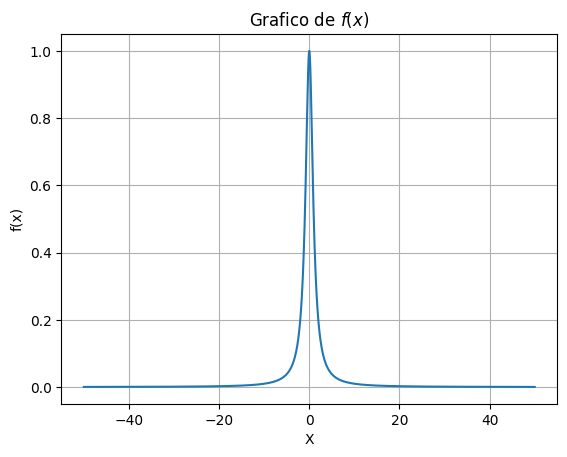

In [13]:
# Grafica de la función para analizar por trapecios:
#Defino la función como objeto numpy:
f = lambda x: 1/(1 + (x**2))

# Definición de intervalo  X a gráficar:
x = np.linspace(-50,50,10000)
#Gráfica:
plt.plot(x,f(x))
plt.title('Grafico de $f(x)$')
plt.xlabel('X')
plt.ylabel('f(x)')
plt.grid()
plt.show()

Debido a la símetría de la función respecto al eje y, podemos reescribir la integral de la siguente manera:

$$
 \int_{0}^{\infty} \frac{2}{1+x^2} \, dx
 $$

La cual por medipo de la librería Sympy nos debe dar el mismo valor que la anterior:


In [14]:
#Definición de xg simbólica:
xg = sp.symbols("xg")

#definición de función:
g = 2/(1 + (xg)**2)

#Defino límites:
ga= 0
gb = sp.oo

#Realizo la integral por Sympy:
integralg = sp.integrate(g, (xg,ga,gb))

print('Integral inicial == integral reescrita:')
print(integral == integralg)
print('valor:')
integralg

Integral inicial == integral reescrita:
True
valor:


pi

Por tanto, graficamos la función reescrita y ademas agregamos un ɛ -> ∞ tal que podamos remmplazar en el límite superior, y podamos calcular la integral numéricamente  por el método del Trapecio, Simpson y Cuadratura:   

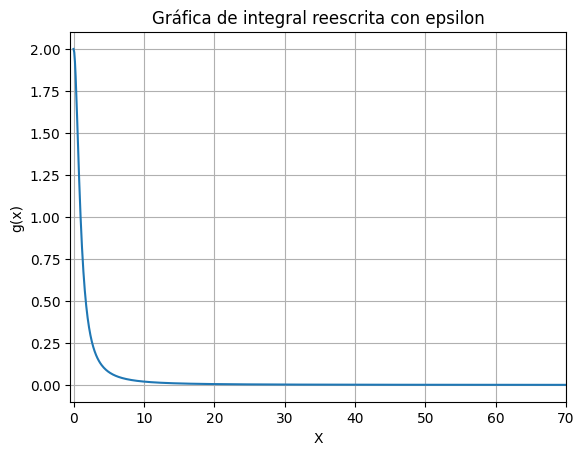

In [15]:
#Definimos el epsilon:
a = 0
eps = 10e4
#definiendo función:
g = lambda x: 2/(1 + (x**2))
#Definimos intervalo en X:
x = np.linspace(a,eps,1000000)
#Grafica:
plt.plot(x, g(x))
plt.title("Gráfica de integral reescrita con epsilon")
plt.xlabel('X')
plt.ylabel('g(x)')
plt.xlim(-0.5,70)
plt.grid()

In [16]:
# Solución de integral por medio de trapecio:
Tg = intetrap(g,a,eps,10000000)

#Solución de integral por método Simpson Compuesto:
Sg = simpcom(g,a,eps,10000000)

#Solución de integtral por Cuadratura de Gauss:
Cg = Cuadratura_G(g,a,eps,1000)


In [17]:
# Imprimimos resultado:
print('METODO TRAPECIO:')
print('La integral por medio de nuestro programa da:',Tg)
print('La integral por medio de la librería scipy da:', trapezoid(g(x),x))
print()
print('METODO SIMPSON COMPUESTO:')
print('La integral por medio de nuestro programa da:',Sg)
print('La integral por medio de la librería scipy da:', simpson(g(x),x))
print()
print('METODO CUADRATURA DE GAUSS:')
print('La integral por medio de nuestro programa da:',Cg)
print('La integral por medio de la librería scipy da:', quad(g,0,eps)[0])

METODO TRAPECIO:
La integral por medio de nuestro programa da: 3.141572339432526
La integral por medio de la librería scipy da: 3.1415726535897948

METODO SIMPSON COMPUESTO:
La integral por medio de nuestro programa da: 3.154905672770634
La integral por medio de la librería scipy da: 3.1415726535897464

METODO CUADRATURA DE GAUSS:
La integral por medio de nuestro programa da: 3.1408052091002645
La integral por medio de la librería scipy da: 3.1415726535898214


Calculo de la integral:

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$

In [18]:
#Lites de Y:
l1 = lambda x: np.sin(x)
l2 = lambda x: np.cos(x)

#lìmites de x:
a = 0
b = (np.pi/4)

#definimos x equidistantes en el intervalo de limites en X:
x = np.linspace(a,b,1000)

#Integrando la funciòn con respecto a Y y almacenamos el resultado en la variable I[j]:
j = 0
I = np.zeros(len(x))
for i in x:
  f_i = lambda y: ((2*y*np.sin(i)) + (np.cos(i))**2)
  I[j] = quad(f_i, l1(i),l2(i))[0]
  j += 1

#Se calcula la aproximación de la integral I en el intervalo X.
integral = trapezoid(I,x)
print('EL resultado de la integral doble es: ',integral)


EL resultado de la integral doble es:  0.5118445260477336


### 5. Pendulo Físico:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

In [19]:
#Parámetros Iniciales:

thetai = np.deg2rad(45) #Ángulo inicial
g = 9.8                 #Gravedad
b = 0.25                #Longitud de hilo(m)
d = 1                   #Parametro geométrico del sistema
m = 1                   #Masa del péndulo
I0 = b**2*m*d

#Hallamos Periodo:

T = 2*np.pi*(np.sqrt(b*d/g))

#Se halla valor de K pararesolver integral:

K = np.sin(thetai/2)

#Definimos lìmites de la integral:

a = 0
b= np.pi/2

#Definimos phi como array:

phi = np.linspace(a,b,1000)

#Definimos la función numérica:

p_num = 2*T/(np.pi *np.sqrt(1- (K**2 * np.sin(phi)**2) ))

P = trapezoid(p_num,phi)

print("El periodo inicial del pendulo es: ",P)


El periodo inicial del pendulo es:  1.0436600087397971


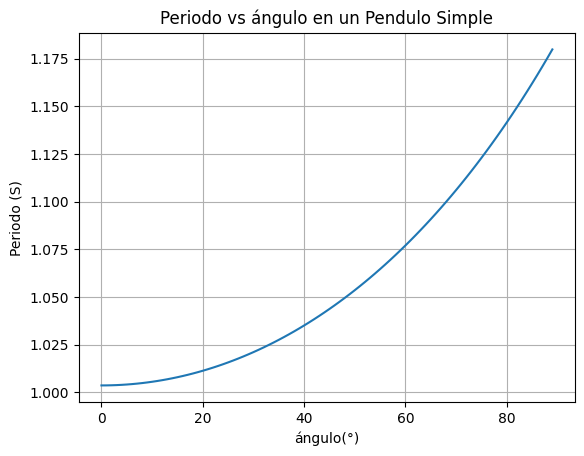

In [20]:
#Realizamos una función para determinar el periodo como función númerica de un péndulo:

def periodo(b,d, thetai):
  thetai = np.deg2rad(thetai) #Ángulo inicial
  g = 9.8                 #Gravedad
  b = b                #Longitud de hilo(m)
  d = d                   #Parametro geométrico del sistema
  m = 1                   #Masa del péndulo
  I0 = b**2*m*d

  T = 2*np.pi*(np.sqrt(b*d/g))
  K = np.sin(thetai/2)
  #Definimos lìmites de la integral:

  a = 0
  b= np.pi/2

  #Definimos phi como array:

  phi = np.linspace(a,b,1000)

  #Definimos la función numérica:

  p_num = 2*T/(np.pi *np.sqrt(1- (K**2 * np.sin(phi)**2) ))

  return p_num


#Utilizamos la función:
b = 0.25                #Longitud de hilo(m)
d = 1                   #Parametro geométrico del sistema
thetai = np.arange(0, 90, 1)
p_vals = np.zeros(len(thetai))
j=0

# Secrea un ciclo para graficar P en funciòn del aǹgulo:
for i in thetai:
  p_vals[j] = trapezoid(periodo(b,d,thetai[i]), phi)
  j += 1


plt.plot(thetai, p_vals, label="P(s)")
plt.title("Periodo vs ángulo en un Pendulo Simple")
plt.xlabel("ángulo(°)")
plt.ylabel("Periodo (S)")
plt.grid()
plt.show()


### 6. Loop con Coordenadas Esféricas

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



##### Para A). $A_𝞍(r=1.1 , θ) vs. θ $

In [29]:
#Definimos la función que vamos a graficar:
def A(r,thetai):
  a = 1
  I = 3
  c = 1   #c= u_0/4*pi
  #Definimos función K:
  theta = np.deg2rad(thetai) #Pasamos los angulos a readianes:
  k = np.sqrt((4*a*r*np.sin(theta))/(a**2 + r**2 + (2*a*r*np.sin(theta))))
  # Límites de integrales:
  inf = 0
  sup = np.pi/2
  #Se define phi como array:
  phi = np.linspace(inf, sup, 1000)
  #Se define las funciones numéricas a integrar:
  E_num = np.sqrt(1 -(k**2 * np.sin(phi)**2))
  K_num = 1/(np.sqrt(1 -(k**2 * np.sin(phi)**2)))
  #realiza las integrales de las funciones numericas definidas
  Ek = trapezoid(E_num, phi)
  Kk = trapezoid(K_num, phi)
  #calculo de A
  B = (((2 - k**2)*Kk) - 2*Ek)/k**2
  A = (c*4*I*a/np.sqrt(a**2 + r**2 +(2*a*r*np.sin(theta))))*B

  return A

#Probamos la función para un r y un thta fijo:
r = 1.1
thetai = 45
A(r,thetai)

3.0225471320345263

<ipython-input-29-d215959d6cf5>:29: RuntimeWarning: invalid value encountered in double_scalars
  B = (((2 - k**2)*Kk) - 2*Ek)/k**2


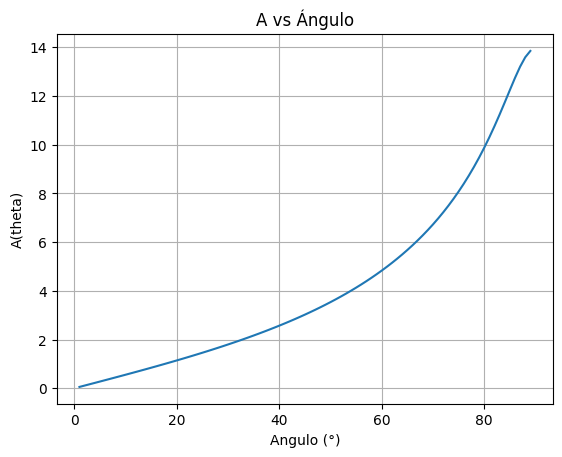

In [31]:
# Evaluamos la función en un theta variable y graficamos:
r = 1.1
theta = np.arange(0,90,1)

Vals_A = np.zeros(len(theta))
j = 0
#Ciclo para graficas:
for i in theta:
  Vals_A[j] = A(r,theta[i])
  j += 1

plt.plot(theta, Vals_A)
plt.title('A vs Ángulo')
plt.xlabel('Angulo (°)')
plt.ylabel('A(theta)')
plt.grid()
plt.show()


##### Para A). $A_𝞍(r, θ = π/3) vs. r $

<ipython-input-29-d215959d6cf5>:29: RuntimeWarning: invalid value encountered in double_scalars
  B = (((2 - k**2)*Kk) - 2*Ek)/k**2


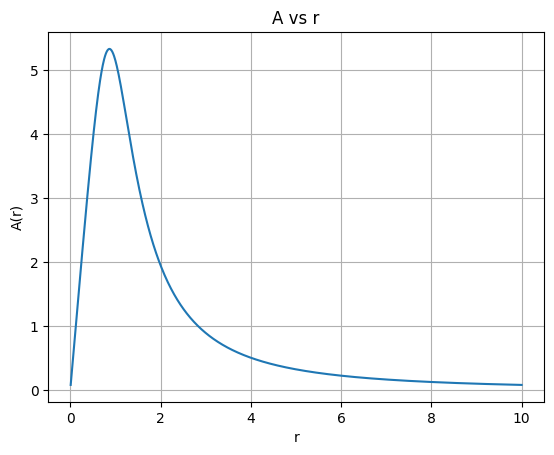

In [38]:
# Evaluamos la función en un r variable y graficamos:
r = np.linspace(0,10,1000)
theta = np.rad2deg(np.pi/3)

Vals_A = np.zeros(len(r))
j = 0

#Ciclo para graficas:
for i in range(len(r)):
  Vals_A[j] = A(r[i],theta)
  j += 1

plt.plot(r, Vals_A)
plt.title('A vs r')
plt.xlabel('r')
plt.ylabel('A(r)')
plt.grid()
plt.show()